## Introduction 👋

## Fake News Detection

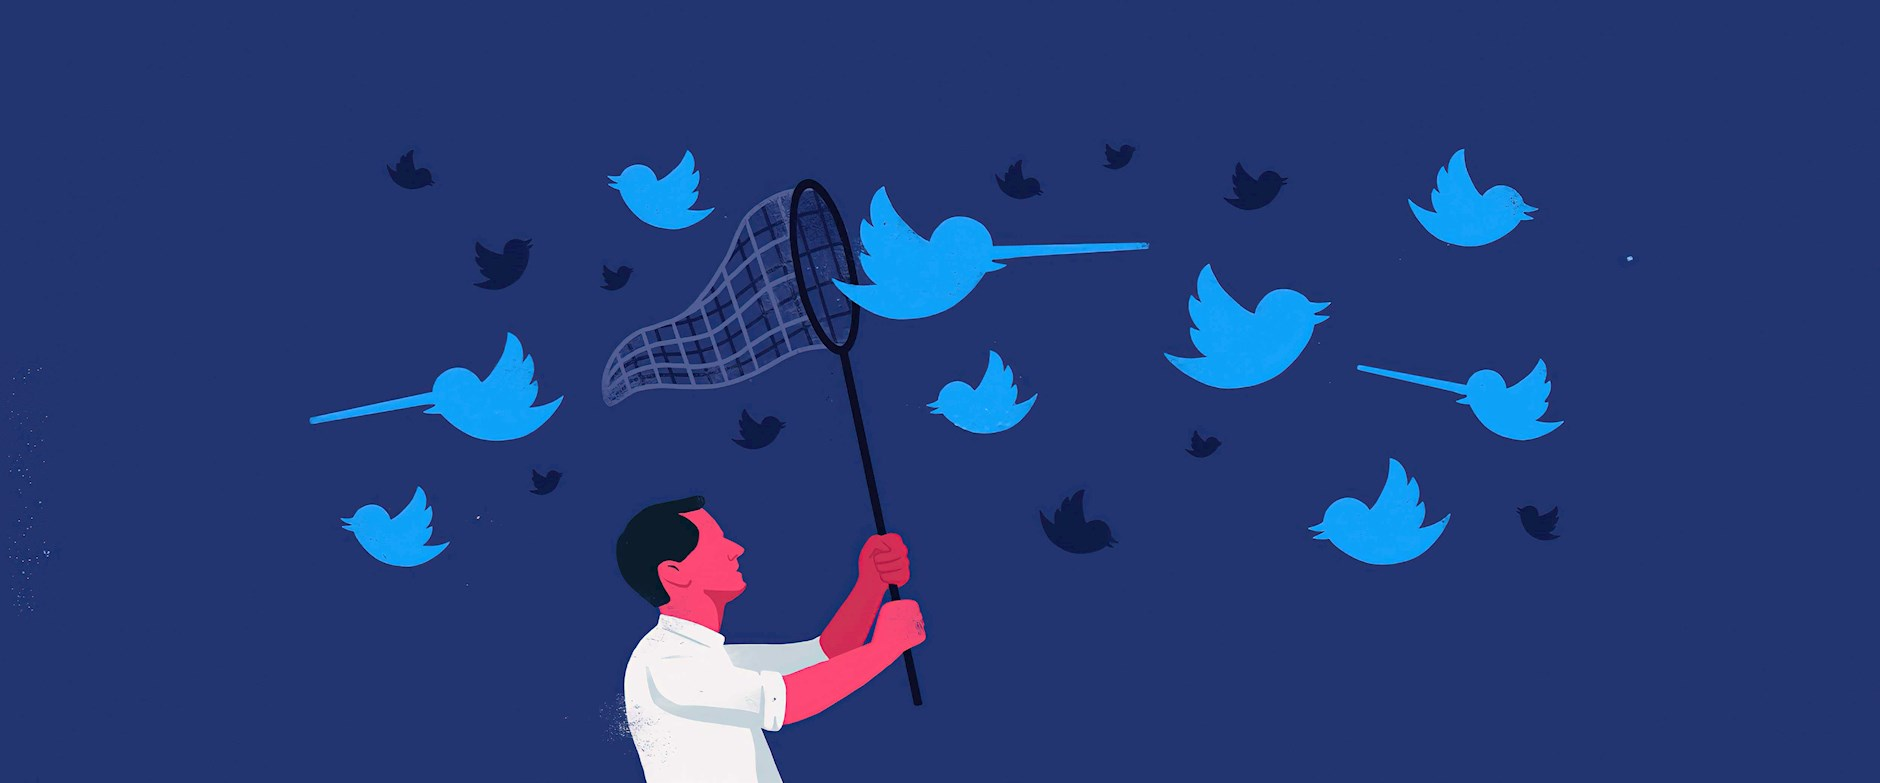

## Problem Statement 🤔 

> What is "Fake News"?

> “Fake news” is a term that has come to mean different things to different people. At its core, we are defining “fake news” as those news stories that are false: the story itself is fabricated, with no verifiable facts, sources or quotes. Sometimes these stories may be propaganda that is intentionally designed to mislead the reader, or may be designed as “clickbait” written for economic incentives (the writer profits on the number of people who click on the story). In recent years, fake news stories have proliferated via social media, in part because they are so easily and quickly shared online.

# About Dataset
> This data set consists of 40000 fake and real news. Our goal is to train our model to accurately predict whether a particular piece of news is real or fake. Fake and real news data are given in two separate data sets, with each data set consisting of approximately 20000 articles.

# Content:

## Import Libraries
## Load and Check Data
## Visualization
## Data Cleaning
- Removal of HTML & urls Contents
- Removal of Punctuation Marks and Special Characters
- Removal of Stopwords
- Removal of Emoji and Emoticons
- Removal of Mintions
- Removal of Digits
- Removal of White spaces
## Lemmatization
- Perform it for all the examples
## N-Gram Analysis
- Unigram Analysis
- Bigram Analysis
- Trigram Analysis
## Modeling
- Train - Test Split
- Tokenizing
- Training many machine learning modles
- Training Rnn Model
- Training Lstm Model
- Training Gru Model
## Model Evaluation

## Import Libraries

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


<iframe src="https://www.kaggle.com/embed/eisgandar/detect-fake-real-news-glove-emb-lstm?cellIds=2&kernelSessionId=112672399" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="📢 Detect Fake &amp; Real News ~ Glove emb, LSTM"></iframe>

In [2]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud


import re 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize
from string import punctuation
from bs4 import BeautifulSoup



from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


import keras
from keras.preprocessing import text,sequence
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

import tensorflow as tf 

In [3]:
nlp = spacy.load("en_core_web_lg")
stop_words = set(STOP_WORDS)
stop_words.update(punctuation) # remove it if you need punctuation 
# stop_words

In [4]:
def report(y_true, y_pred, labels):
    cm = pd.DataFrame(confusion_matrix(y_true=y_true, y_pred=y_pred),index=labels, columns=labels)
    rep = classification_report(y_true=y_true, y_pred=y_pred)
    acc_score=accuracy_score(y_true=y_true, y_pred=y_pred)
    return (f'accuracy_score:\n {acc_score}\n\nConfusion Matrix:\n{cm}\n\nClassification Report:\n{rep}')

In [7]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

## Load and Check Data

In [8]:
true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
false = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [10]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [44]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [45]:
false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

# WordCloud
> A tag cloud (word cloud or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color.[2] This format is useful for quickly perceiving the most prominent terms to determine its relative prominence. When used as website navigation aids, the terms are hyperlinked to items associated with the tag

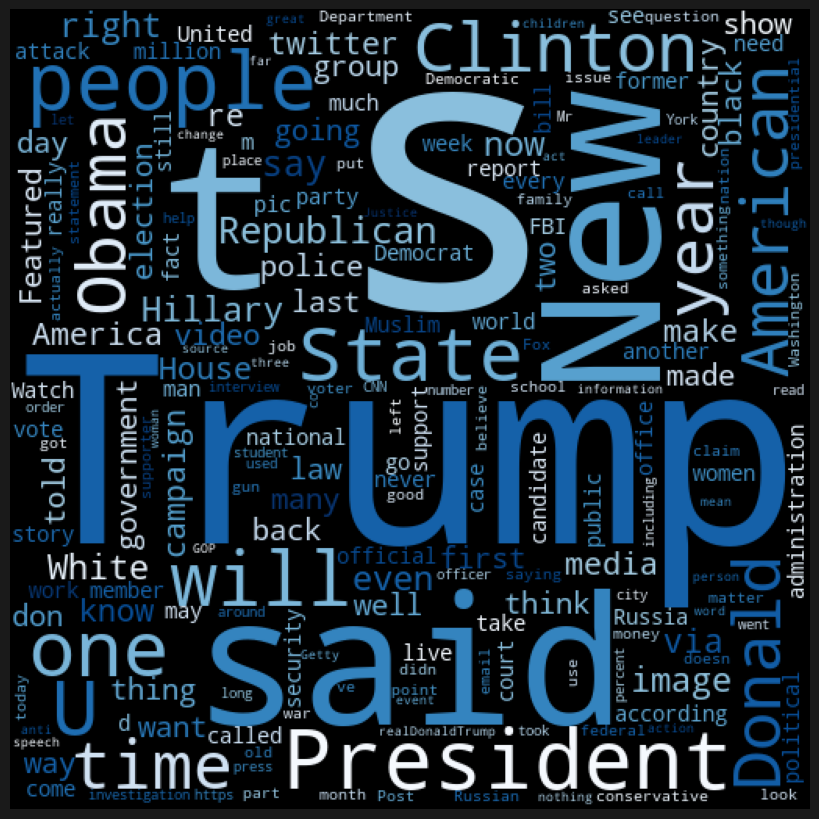

In [46]:
#Wordcloud for fake news
fake_words = ' '.join(list(false['text']))
fake_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(fake_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(fake_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

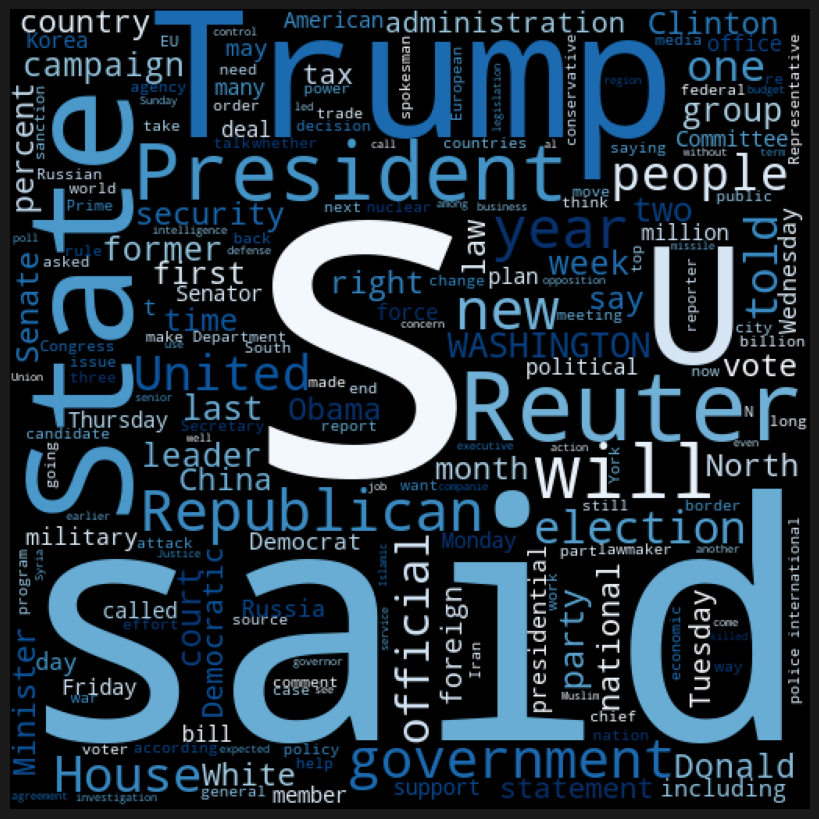

In [47]:
#Wordcloud for True news
true_words = ' '.join(list(true['text']))
true_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(true_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(true_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [9]:
# Fake news 0 , Real news 1
true['label'] = 1
false['label'] = 0

In [10]:
#Merging true and fake news dataset
data = pd.concat([true,false]) 

In [11]:
data = data.sample(frac = 1,random_state=24).reset_index(drop=True)
data.head()

title  \
0  White House: unfortunate that Palestinians dec...   
1   Fox’s Shep Smith Has Yet Another EPIC Anti-Tr...   
2  WOW! OBAMA MEDIA ALLY EXPOSES HUGE LIE: Why Ob...   
3   Trump Posts Disgusting Video Of Himself Vicio...   
4   WATCH: GOP Senator Pleads With Trump To Drop ...   

                                                text    subject  \
0  WEST PALM BEACH, Fla. (Reuters) - The White Ho...  worldnews   
1  As Donald Trump has turned his presidency into...       News   
2  President Obama on ISIS: They re  a bunch of k...   politics   
3  This is beyond unpresidential.During a narciss...       News   
4  Mike Lee (R-Utah) has been a major figure in a...       News   

                 date  label  
0  December 10, 2017       1  
1   February 24, 2017      0  
2        Nov 23, 2015      0  
3  September 17, 2017      0  
4     October 8, 2016      0

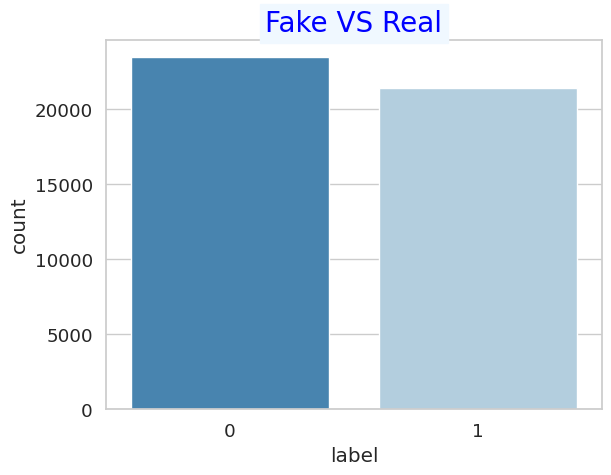

In [50]:
#Check out the distribution of fake news compare to real news¶
chart=sns.countplot(x='label',data=data,palette='Blues_r')
plt.title("Fake VS Real",
          fontsize='20',
          backgroundcolor='aliceblue',
          color='blue');

In [51]:
class_df = data.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='winter')

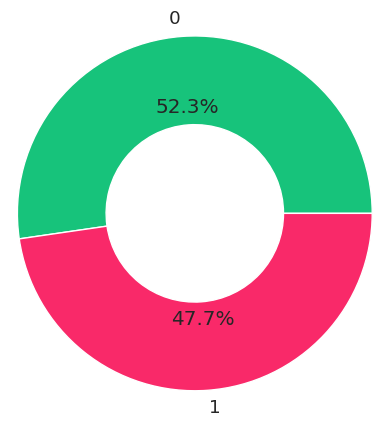

In [52]:
percent_class=class_df.text
class_label= class_df.label
colors = ['#17C37B','#F92969','#FACA0C', '#FF3B49', '#26DE81']
my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=class_label,colors=colors,autopct="%.1f%%")
plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

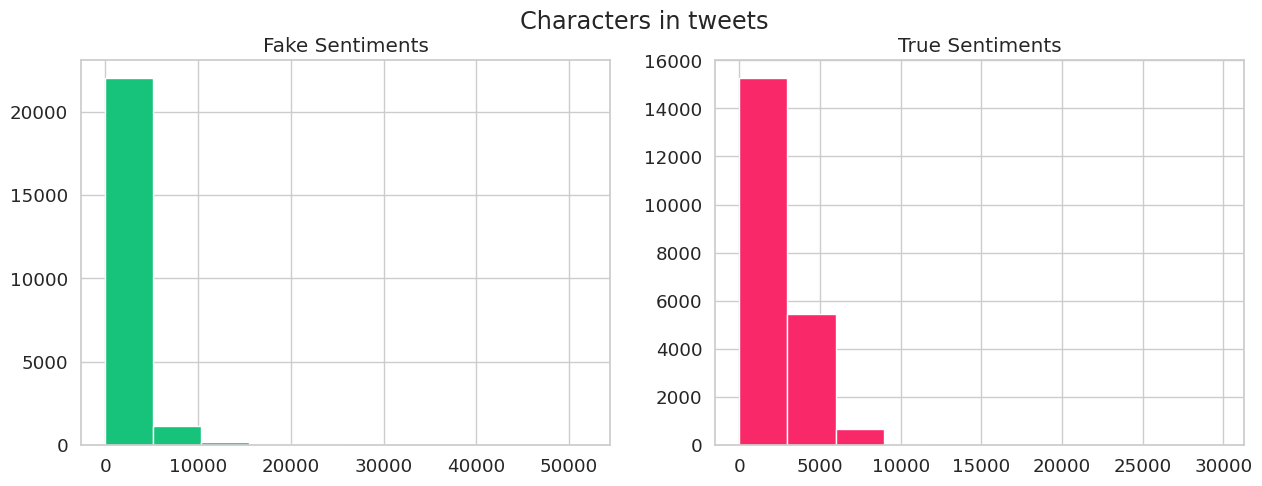

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=data[data['label']==0]['text'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Fake Sentiments')

tweet_len=data[data['label']==1]['text'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('True Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

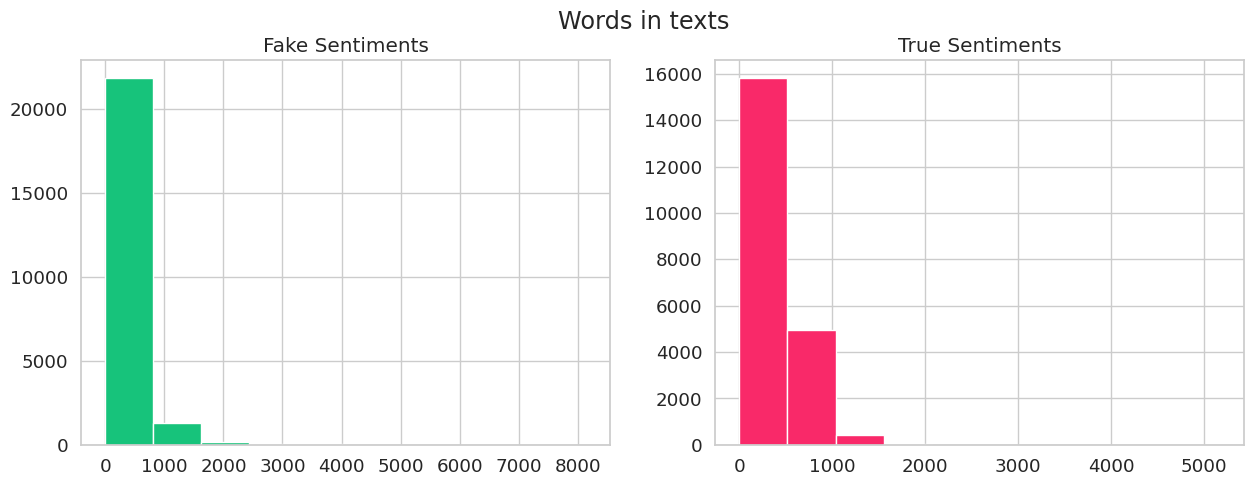

In [69]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=data[data['label']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Fake Sentiments')

tweet_len=data[data['label']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('True Sentiments')

fig.suptitle('Words in texts')
plt.show()

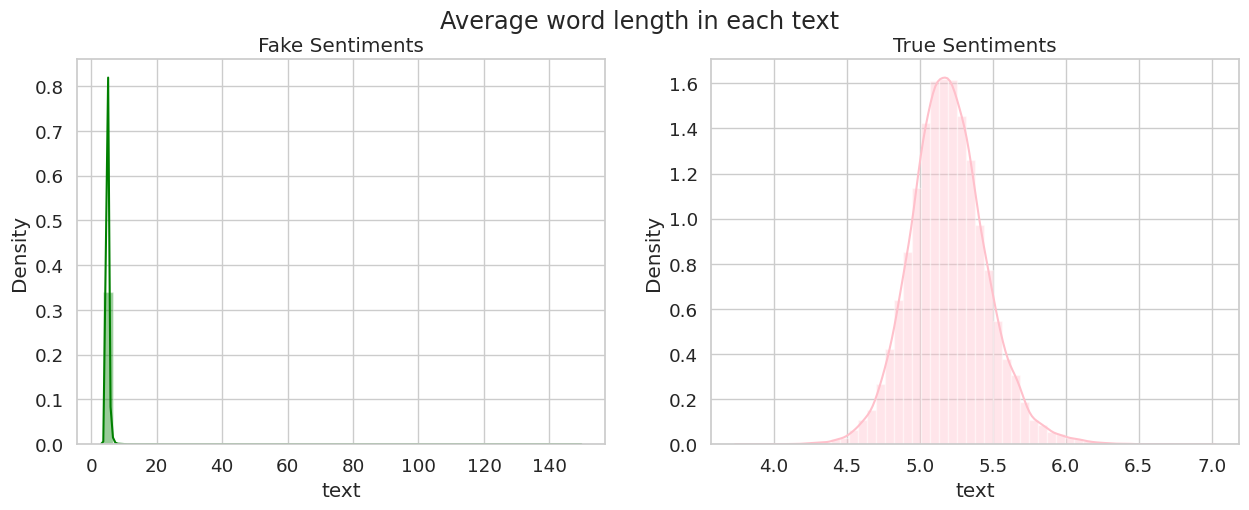

In [94]:
import numpy as np
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
word=data[data['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Fake Sentiments')

word=data[data['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='pink')
ax2.set_title('True Sentiments')

fig.suptitle('Average word length in each text')
plt.show()

## Get some information about datasets

In [54]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)

In [55]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
#get basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [9]:
#check whether there are duplicated values
data.duplicated().sum()

209

In [12]:
# drop duplicated values from the dataset
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [13]:
data = data.reset_index(drop=True)

In [13]:
# Checking for nan Values
data.isna().sum() 

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [62]:
#the number of the texts
data.title.count()

44689

In [63]:
#look class frequencies of 'subject' variable
data.subject.value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

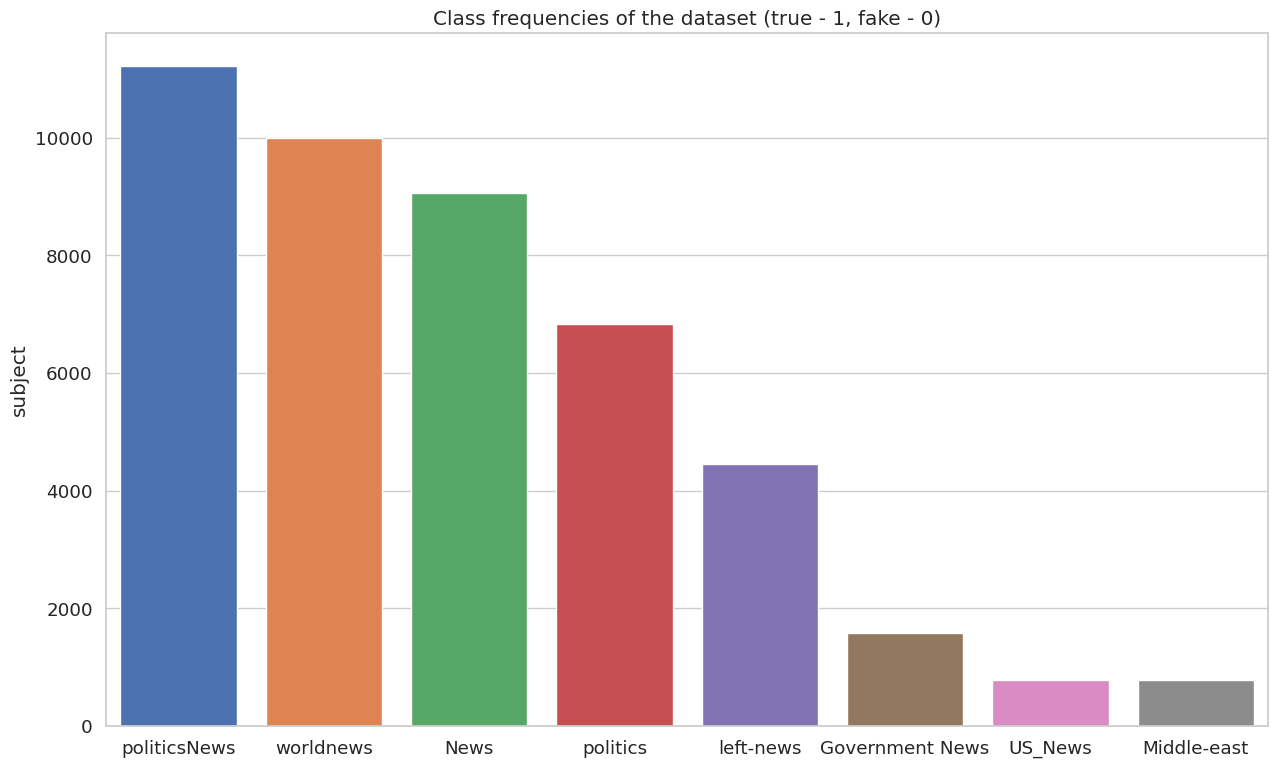

In [68]:
plt.figure(figsize = [15, 9], clear = True, facecolor = 'white')
sns.barplot(x = data["subject"].value_counts().index,
            y = data["subject"].value_counts(),
            saturation = 1).set(title = "Class frequencies of the dataset (true - 1, fake - 0)");

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

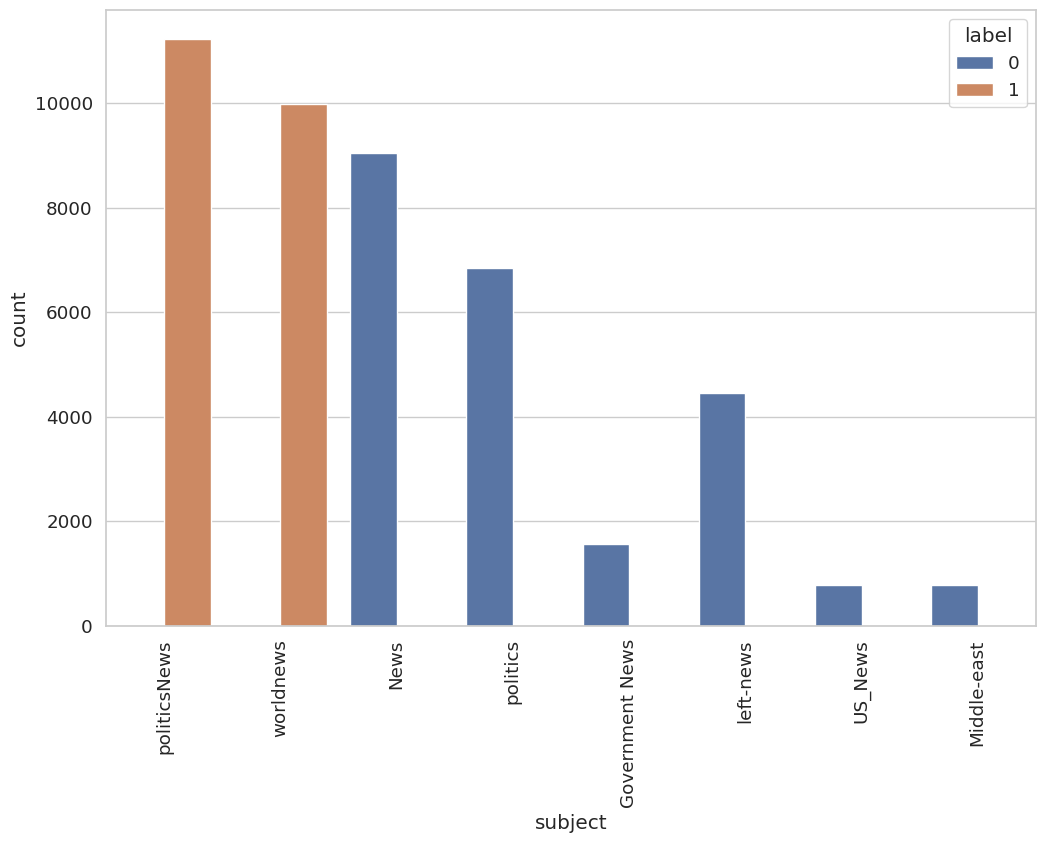

In [64]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "label" , data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [14]:
# Combining the title with the text,
data['text'] = data['text'] + " " + data['title']
del data['title']
del data['subject']
del data['date']

# Data Cleaning

In [15]:
data['cleaned_tweet']  = data['text'].str.lower()
data['cleaned_tweet'].head()

0    west palm beach, fla. (reuters) - the white ho...
1    as donald trump has turned his presidency into...
2    president obama on isis: they re  a bunch of k...
3    this is beyond unpresidential.during a narciss...
4    mike lee (r-utah) has been a major figure in a...
Name: cleaned_tweet, dtype: object

In [16]:
#removing punctuation, creating a new column called 'text_punct]'
data['cleaned_tweet'] = data['cleaned_tweet'].str.replace('[^\w\s]','')
data['cleaned_tweet'].head()

0    west palm beach fla reuters  the white house s...
1    as donald trump has turned his presidency into...
2    president obama on isis they re  a bunch of ki...
3    this is beyond unpresidentialduring a narcissi...
4    mike lee rutah has been a major figure in amon...
Name: cleaned_tweet, dtype: object

In [17]:
# Applying the stopwords to 'text_punct' and store into 'text_stop'
data["cleaned_tweet"] = data["cleaned_tweet"].apply(lambda x: " ".join([w for w in str(x).split() if not w in stop_words]))
data["cleaned_tweet"].head()

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
Name: cleaned_tweet, dtype: object

In [18]:
# Function to remove emoji.
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)


data["cleaned_tweet"] = data["cleaned_tweet"].apply(lambda x: remove_emoji(str(x)))
data["cleaned_tweet"].head()

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
Name: cleaned_tweet, dtype: object

In [19]:
# Function for removing emoticons
def remove_emoticons(tweet):
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
        cleaned_tweet = emoji_pattern.sub(r'',tweet)
        return cleaned_tweet

data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_emoticons)
data["cleaned_tweet"].head()

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
Name: cleaned_tweet, dtype: object

In [20]:
def remove_urls(tweet):
    return re.sub(r'http[^\s]*','',tweet)


data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_urls)
data["cleaned_tweet"].head()

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
Name: cleaned_tweet, dtype: object

In [21]:
#Function for removing html
def remove_html(tweet):
    return BeautifulSoup(tweet, "lxml").text

data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_html)
data["cleaned_tweet"].head()

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
Name: cleaned_tweet, dtype: object

In [22]:
def remove_mintions(tweet):
    cleaned_tweet = re.sub(r"@\S+",'',tweet)
    return cleaned_tweet

data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_mintions)
data["cleaned_tweet"].head()

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
Name: cleaned_tweet, dtype: object

In [23]:
def remove_images(tweet):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', tweet)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)
    return cleaned_tweet

data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_images)
data["cleaned_tweet"].head(10)

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
5    reuters washington governor jay inslee tuesday...
6    manila reuters leaders asia joined president d...
7    message 100 fed mom facebook friendsdear frien...
8    reuters following people mentioned contenders ...
9    donald trump bed russians knows hide taxes cla...
Name: cleaned_tweet, dtype: object

In [24]:
def remove_duplicated_chars(tweet):
    return re.sub(r'(.)\1+', r'\1\1', tweet)  # keep 2 repeat

data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_duplicated_chars)
data["cleaned_tweet"].head(10)

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
5    reuters washington governor jay inslee tuesday...
6    manila reuters leaders asia joined president d...
7    message 100 fed mom facebook friendsdear frien...
8    reuters following people mentioned contenders ...
9    donald trump bed russians knows hide taxes cla...
Name: cleaned_tweet, dtype: object

In [25]:
def remove_tweet_digits(tweet):
    cleaned_tweet = re.sub(r'[d]+', r'', tweet)
    cleaned_tweet = re.sub(r'[0-9]*','',tweet)
    cleaned_tweet = re.sub(r'([0-9]*\-[0-9]*)*', '', cleaned_tweet)
    return cleaned_tweet 

data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_tweet_digits)
data["cleaned_tweet"].head(10)

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
5    reuters washington governor jay inslee tuesday...
6    manila reuters leaders asia joined president d...
7    message  fed mom facebook friendsdear friendsi...
8    reuters following people mentioned contenders ...
9    donald trump bed russians knows hide taxes cla...
Name: cleaned_tweet, dtype: object

In [26]:
def remove_chars(tweet):
    cleaned_tweet = re.sub(r'[/(){}\[\]\|]', '', tweet)
    cleaned_tweet = re.sub(r'[!$%^?&*><]', '', cleaned_tweet )
    cleaned_tweet = re.sub(r'[\'\"،—.,;+-=]', '', cleaned_tweet )
    cleaned_tweet = re.sub(r'[\n]', '', cleaned_tweet ) # removing \n
    cleaned_tweet =re.sub(r"\s+",' ',cleaned_tweet) # remove_extra_white_space
    return cleaned_tweet

data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_chars)
data["cleaned_tweet"].head(10)

0    west palm beach fla reuters white house said s...
1    donald trump turned presidency war mainstream ...
2    president obama isis bunch killers good social...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
5    reuters washington governor jay inslee tuesday...
6    manila reuters leaders asia joined president d...
7    message fed mom facebook friendsdear friendsi ...
8    reuters following people mentioned contenders ...
9    donald trump bed russians knows hide taxes cla...
Name: cleaned_tweet, dtype: object

In [27]:
def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

data['cleaned_tweet'] = data['cleaned_tweet'].apply(remove_single_char_func)
data.head()

text  label  \
0  WEST PALM BEACH, Fla. (Reuters) - The White Ho...      1   
1  As Donald Trump has turned his presidency into...      0   
2  President Obama on ISIS: They re  a bunch of k...      0   
3  This is beyond unpresidential.During a narciss...      0   
4  Mike Lee (R-Utah) has been a major figure in a...      0   

                                       cleaned_tweet  
0  west palm beach fla reuters white house said s...  
1  donald trump turned presidency war mainstream ...  
2  president obama isis bunch killers good social...  
3  unpresidentialduring narcissistic tweetstorm s...  
4  mike lee rutah major figure congressional repu...

# Find out common words

In [28]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.cleaned_tweet)
corpus[:10]

['west',
 'palm',
 'beach',
 'fla',
 'reuters',
 'white',
 'house',
 'said',
 'sunday',
 'unfortunate']

In [29]:
from collections import Counter
list_words_merge = list(corpus)
d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()

index   count
0       said  129065
1      trump  127967
2  president   52393
3     people   41465
4        new   32550

In [30]:
top_common_words.tail()

index  count
45      senate  13321
46     support  13290
47       north  13228
48  democratic  13212
49        vote  13153

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'said'),
  Text(1, 0, 'trump'),
  Text(2, 0, 'president'),
  Text(3, 0, 'people'),
  Text(4, 0, 'new'),
  Text(5, 0, 'state'),
  Text(6, 0, 'house'),
  Text(7, 0, 'reuters'),
  Text(8, 0, 'donald'),
  Text(9, 0, 'clinton'),
  Text(10, 0, 'states'),
  Text(11, 0, 'obama'),
  Text(12, 0, 'government'),
  Text(13, 0, 'republican'),
  Text(14, 0, 'white'),
  Text(15, 0, 'united'),
  Text(16, 0, 'told'),
  Text(17, 0, 'like'),
  Text(18, 0, 'campaign'),
  Text(19, 0, 'news'),
  Text(20, 0, 'election'),
  Text(21, 0, 'time'),
  Text(22, 0, 'party'),
  Text(23, 0, 'year'),
  Text(24, 0, 'hillary'),
  Text(25, 0, 'washington'),
  Text(26, 0, 'video'),
  Text(27, 0, 'country'),
  Text(28, 0, 'years'),
  Text(29, 0, 'media'),
  Text(30, 0, 'security'),
  Text(3

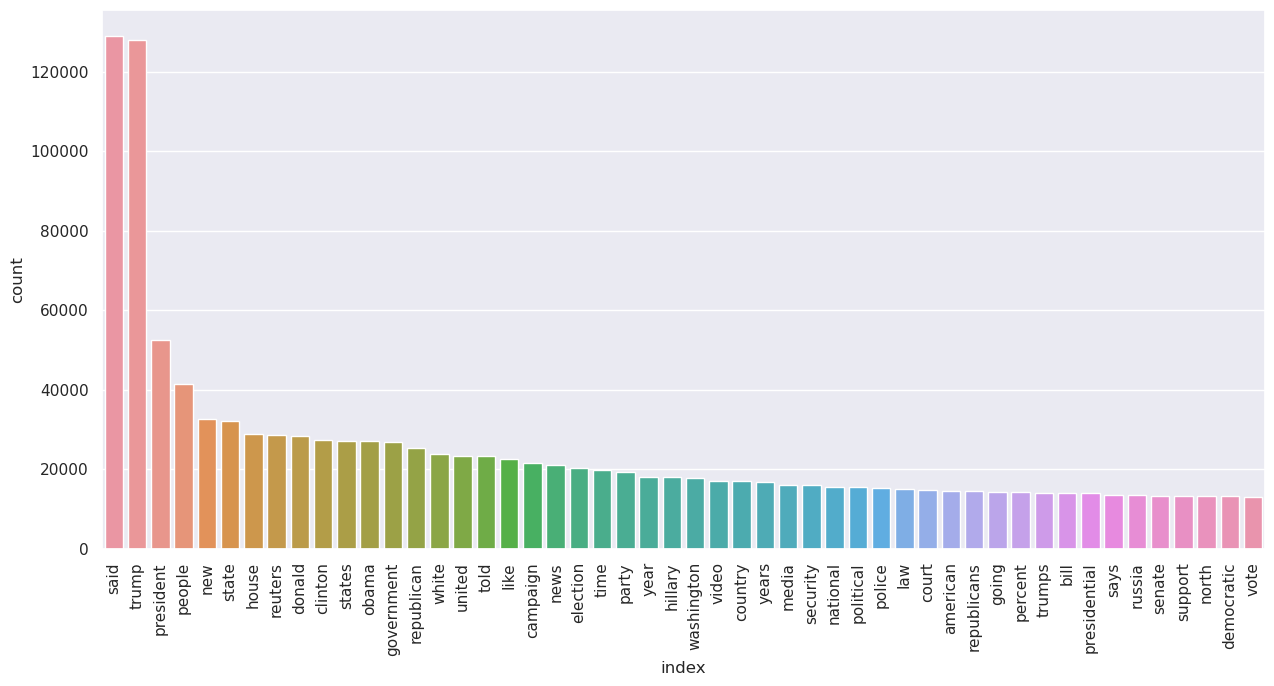

In [37]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=90)

In [31]:
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'said': 129065,
 'trump': 127967,
 'president': 52393,
 'people': 41465,
 'new': 32550,
 'state': 32132,
 'house': 28791,
 'reuters': 28537,
 'donald': 28483,
 'clinton': 27385}

In [32]:
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in most_common])
# Passing the function freqwords
data["cleaned_tweet"] = data["cleaned_tweet"].apply(freqwords)
data["cleaned_tweet"].head()

0    west palm beach fla white sunday unfortunate p...
1    turned presidency war mainstream media media f...
2    obama isis bunch killers good social media dan...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
Name: cleaned_tweet, dtype: object

In [33]:
# Removal of 10 rare words and store into new column called 'text_rare'
freq = pd.Series(' '.join(data["cleaned_tweet"]).split()).value_counts()[-10:] # 10 rare words
freq = list(freq.index)
freq
data["cleaned_tweet"] =data["cleaned_tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data["cleaned_tweet"].head()

0    west palm beach fla white sunday unfortunate p...
1    turned presidency war mainstream media media f...
2    obama isis bunch killers good social media dan...
3    unpresidentialduring narcissistic tweetstorm s...
4    mike lee rutah major figure congressional repu...
Name: cleaned_tweet, dtype: object

In [ ]:
fake_texts = ' '.join(data[data['label']==0]['cleaned_tweet'])
true_texts = ' '.join(data[data['label']==1]['cleaned_tweet'])

In [51]:
fake_string = fake_texts.split(" ")
true_string = true_texts.split(" ")

# N-Gram


> In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles

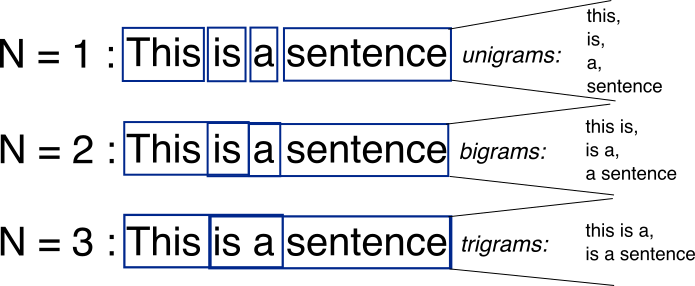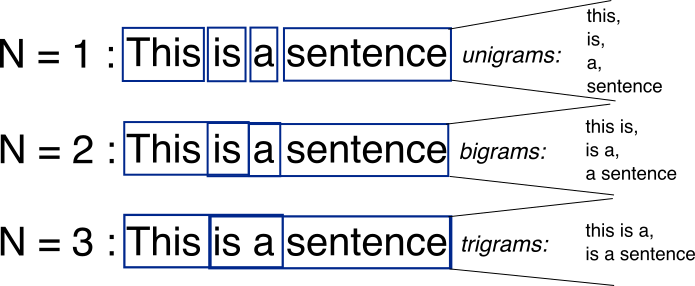

*N-gram Analysis - Unigram-Bigram and Trigram*


In [52]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

**Unigram Analysis**

           word  count
0      (trump,)  81156
1       (said,)  31207
2  (president,)  26667
3     (people,)  26449
4      (obama,)  19624


<AxesSubplot:xlabel='count', ylabel='word'>

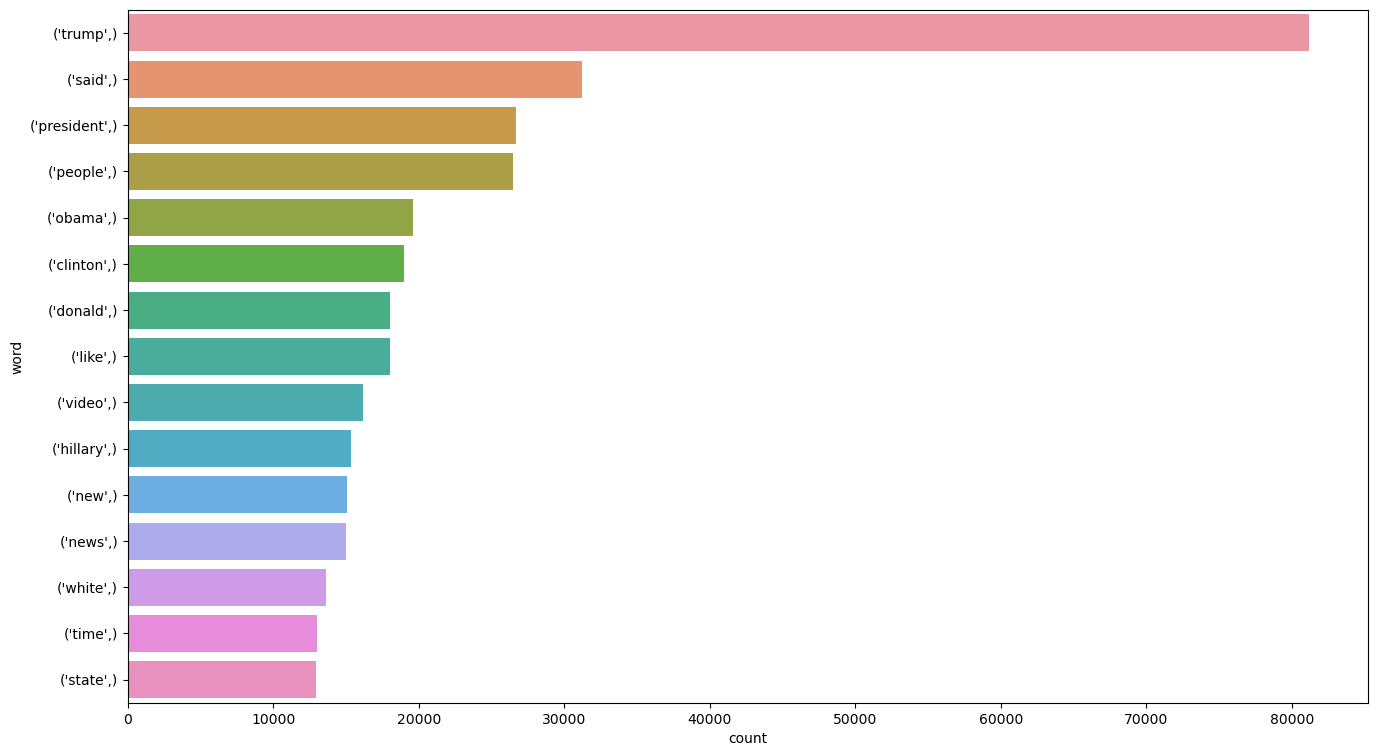

In [53]:
draw_n_gram(fake_string,1)

           word  count
0       (said,)  97858
1      (trump,)  46811
2    (reuters,)  28169
3  (president,)  25726
4      (state,)  19175


<AxesSubplot:xlabel='count', ylabel='word'>

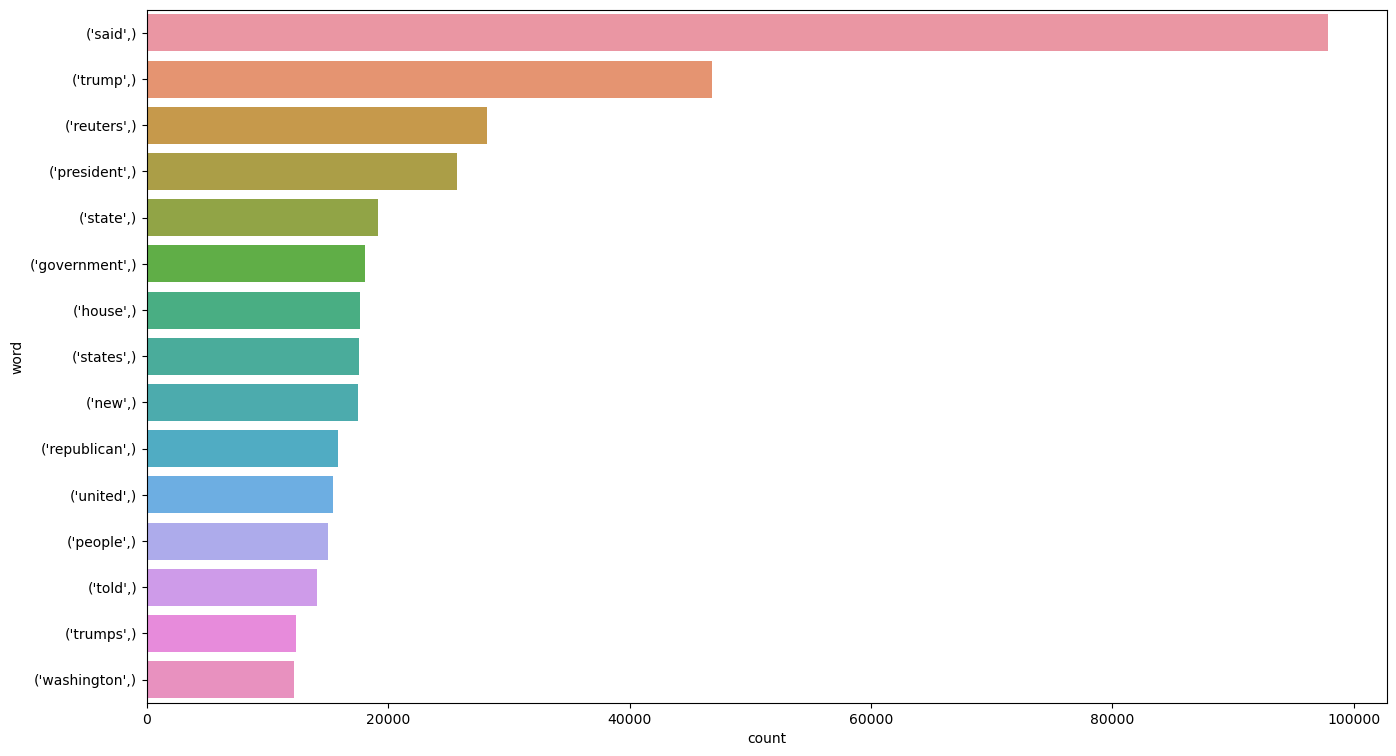

In [57]:
draw_n_gram(true_string ,1)

**Bigram Analysis**

                 word  count
0     (donald, trump)  16004
1  (hillary, clinton)   7037
2      (white, house)   6623
3    (united, states)   6204
4         (new, york)   4288


<AxesSubplot:xlabel='count', ylabel='word'>

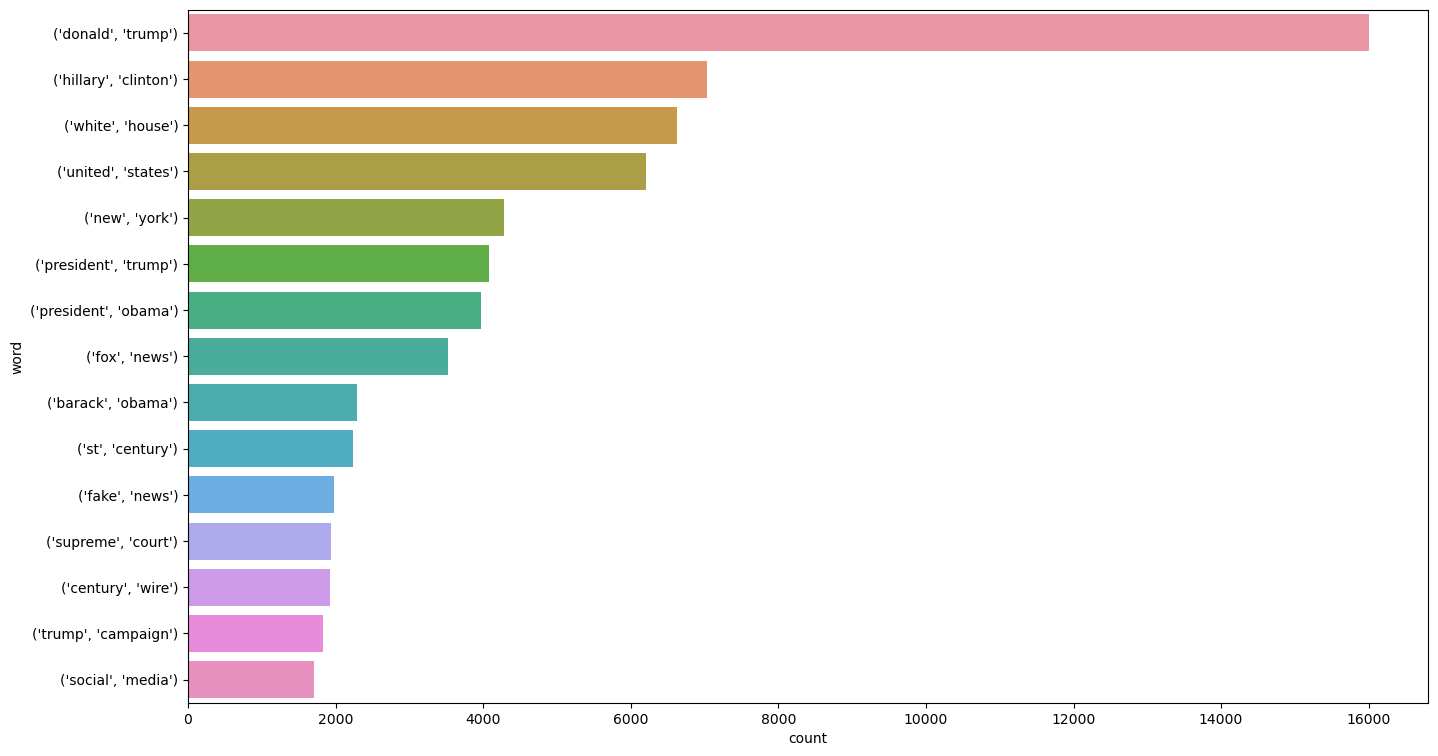

In [58]:
draw_n_gram(fake_string,2)

                    word  count
0       (united, states)  12036
1         (white, house)   8989
2        (donald, trump)   8009
3  (washington, reuters)   6459
4    (president, donald)   5875


<AxesSubplot:xlabel='count', ylabel='word'>

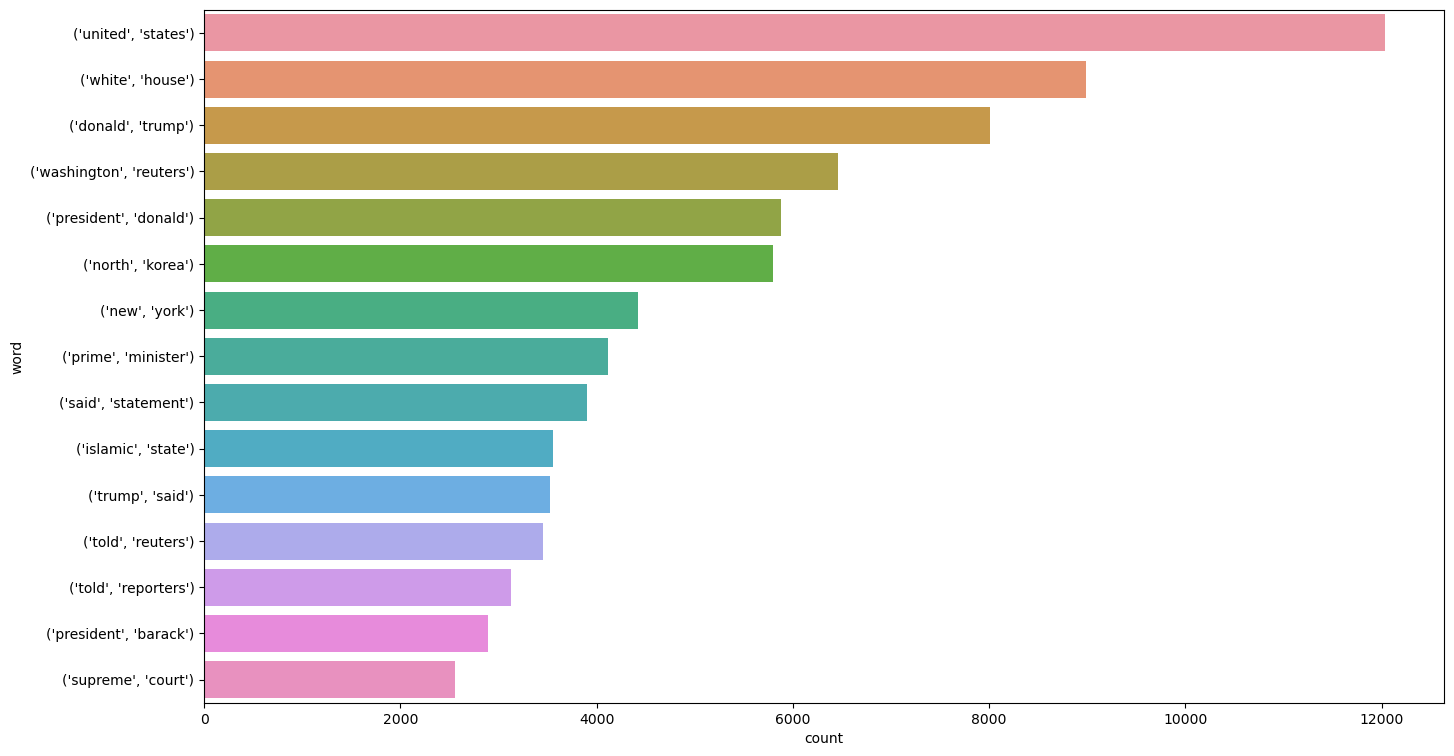

In [59]:
draw_n_gram(true_string,2)

**Trigram Analysis**

                               word  count
0               (st, century, wire)   1906
1  (donald, trump, realdonaldtrump)   1692
2                (new, york, times)   1525
3            (black, lives, matter)   1372
4        (president, donald, trump)    961


<AxesSubplot:xlabel='count', ylabel='word'>

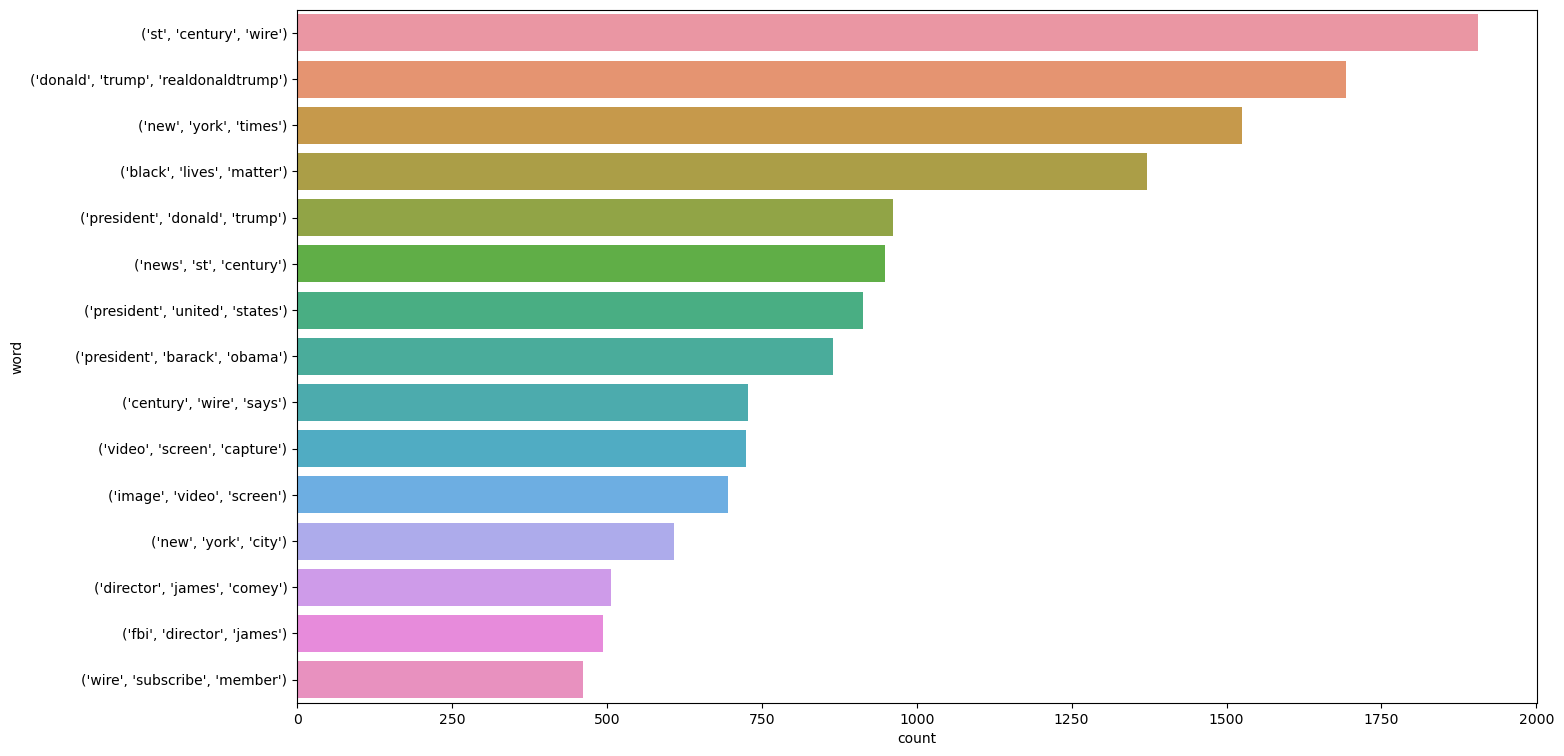

In [60]:
draw_n_gram(fake_string,3)

                               word  count
0        (president, donald, trump)   4412
1        (president, barack, obama)   1986
2      (reuters, president, donald)   1549
3       (president, donald, trumps)   1404
4  (washington, reuters, president)   1338


<AxesSubplot:xlabel='count', ylabel='word'>

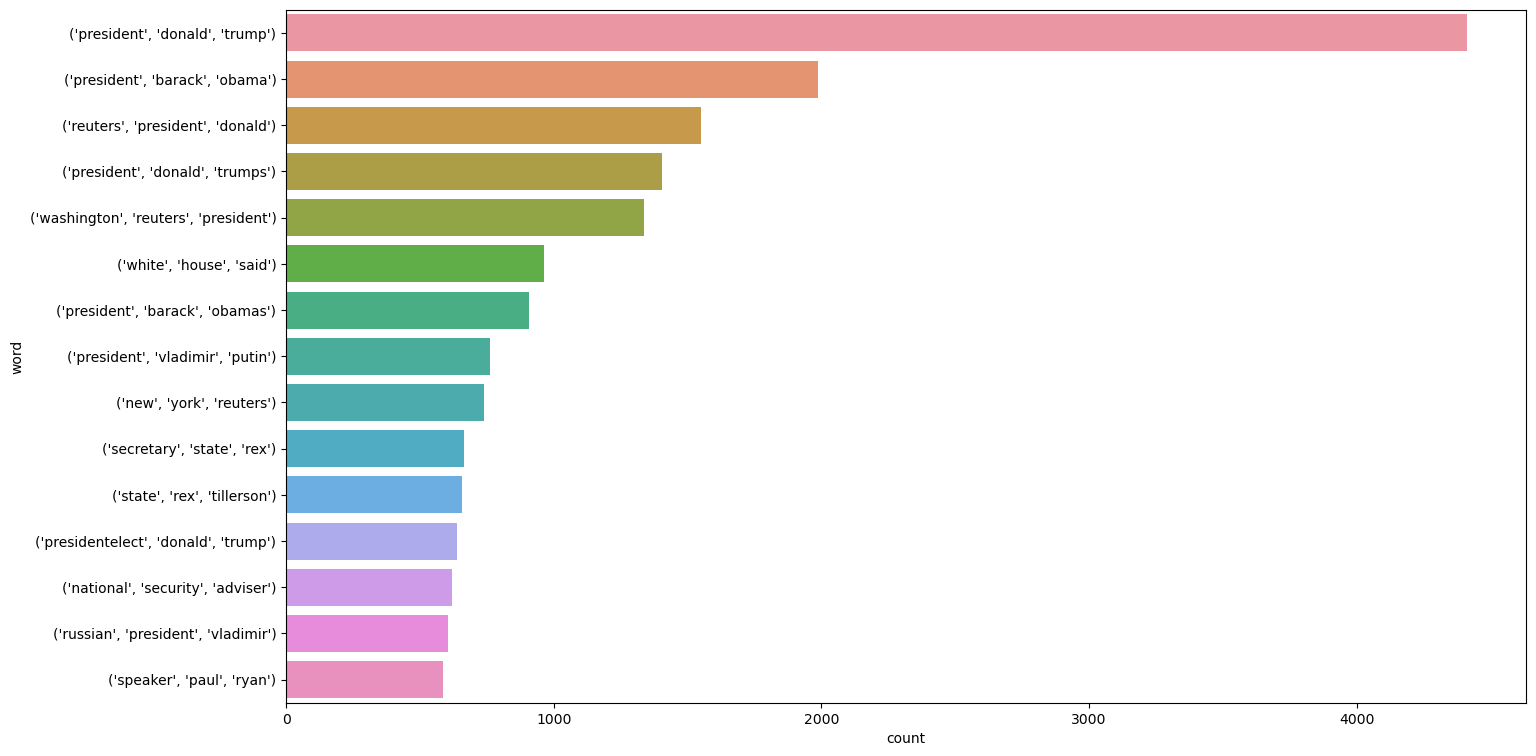

In [61]:
draw_n_gram(true_string,3)

# Lemmatization with spacy

In [34]:
lemma = []


t0 = datetime.now()
for tweet in nlp.pipe(data['cleaned_tweet'], batch_size=100, n_process=3):
    if tweet.is_parsed:
        lemma.append([n.lemma_ for n in tweet])
    else:
        lemma.append(None)

data['lemma'] = lemma

t1 = datetime.now()
print('Processing time: {}'.format(t1 - t0))

Processing time: 0:15:04.943570


In [35]:
data.head()

text  label  \
0  WEST PALM BEACH, Fla. (Reuters) - The White Ho...      1   
1  As Donald Trump has turned his presidency into...      0   
2  President Obama on ISIS: They re  a bunch of k...      0   
3  This is beyond unpresidential.During a narciss...      0   
4  Mike Lee (R-Utah) has been a major figure in a...      0   

                                       cleaned_tweet  \
0  west palm beach fla white sunday unfortunate p...   
1  turned presidency war mainstream media media f...   
2  obama isis bunch killers good social media dan...   
3  unpresidentialduring narcissistic tweetstorm s...   
4  mike lee rutah major figure congressional repu...   

                                               lemma  
0  [west, palm, beach, fla, white, sunday, unfort...  
1  [turn, presidency, war, mainstream, media, med...  
2  [obama, isis, bunch, killers, good, social, me...  
3  [unpresidentialdure, narcissistic, tweetstorm,...  
4  [mike, lee, rutah, major, figure, congressiona...

In [36]:
# Lemmatized essays re-joined (list to essay)
data['l_essay'] = data['lemma'].apply(' '.join)

**will use glove embeddings from spacy**

In [41]:
data['vector'] = data['l_essay'].apply(lambda text: nlp(text).vector)

## Training and Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split( data.vector.values, data['label'], random_state=0,shuffle = True) "

In [59]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [71]:
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = LogisticRegression()
clf.fit(scaled_train_embed, y_train)

LogisticRegression()

In [72]:
y_pred = clf.predict(scaled_test_embed)

In [73]:
print(report(y_test,y_pred, clf.classes_ ))

accuracy_score:
 0.9411080282824666

Confusion Matrix:
      0     1
0  5524   346
1   312  4991

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5870
           1       0.94      0.94      0.94      5303

    accuracy                           0.94     11173
   macro avg       0.94      0.94      0.94     11173
weighted avg       0.94      0.94      0.94     11173



# Splitting the data into 2 parts - training and testing data

In [39]:
X_train, X_test, y_train, y_test = train_test_split( data.l_essay, data.label, random_state=0,shuffle = True,stratify=data.label) 

In [40]:
print ("Training set shapes:", X_train.shape, y_train.shape)
print ("Test set shapes:", X_test.shape, y_test.shape)

Training set shapes: (33516,) (33516,)
Test set shapes: (11173,) (11173,)


# vectorization 
**Extracting Features from Text**



> CountVectorizer

> create bag-of-words features

> the frequency of each word that occurs in the entire text

In [60]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=3,max_df=0.3,ngram_range=(1,3),binary=False)
#transformed train reviews
cv_train=cv.fit_transform(X_train)
#transformed test reviews
cv_test=cv.transform(X_test)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)

BOW_cv_train: (33516, 744080)
BOW_cv_test: (11173, 744080)


> TfidfVectorizer

> TF-IDF is intended to reflect how relevant a term is in a given document.

In [65]:

#Tfidf vectorizer
tf=TfidfVectorizer(min_df=3,max_df=0.3,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tf_train=tf.fit_transform(X_train)
#transformed test reviews
tf_test=tf.transform(X_test)
print('Tfidf_train:',tf_train.shape)
print('Tfidf_test:',tf_test.shape)

Tfidf_train: (33516, 744080)
Tfidf_test: (11173, 744080)


### Building Machine Learning Models 


In [66]:
lr= LogisticRegression()
#training the model
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tf_train,y_train)
print(lr_tfidf)

LogisticRegression()
LogisticRegression()


In [67]:
#Predicting the model for bag of words
lr_bow_predict=lr_bow.predict(cv_test)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr_tfidf.predict(tf_test)
print(lr_tfidf_predict)

[0 1 1 ... 0 0 1]
[0 1 1 ... 0 0 1]


In [68]:
print(report(y_test,lr_bow_predict, lr_bow.classes_ ))

accuracy_score:
 0.9617828694173454

Confusion Matrix:
      0     1
0  5492   378
1    49  5254

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5870
           1       0.93      0.99      0.96      5303

    accuracy                           0.96     11173
   macro avg       0.96      0.96      0.96     11173
weighted avg       0.96      0.96      0.96     11173



In [69]:
print(report(y_test,lr_tfidf_predict,lr_tfidf.classes_ ))

accuracy_score:
 0.9803991765864136

Confusion Matrix:
      0     1
0  5748   122
1    97  5206

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5870
           1       0.98      0.98      0.98      5303

    accuracy                           0.98     11173
   macro avg       0.98      0.98      0.98     11173
weighted avg       0.98      0.98      0.98     11173



In [74]:
pip install skplt

ERROR: Could not find a version that satisfies the requirement skplt (from versions: none)
ERROR: No matching distribution found for skplt
Note: you may need to restart the kernel to use updated packages.


In [76]:
import scikitplot as skplt

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

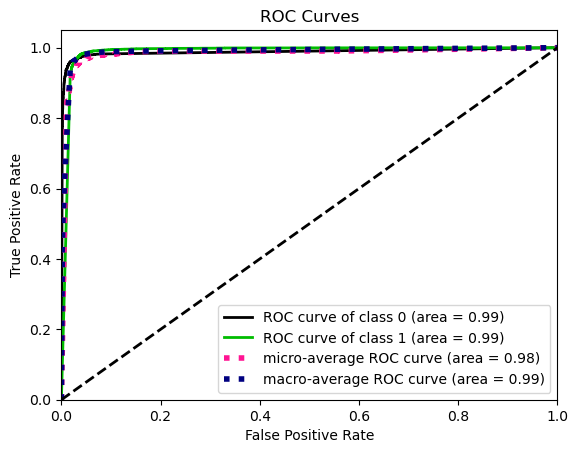

In [77]:
skplt.metrics.plot_roc(y_test,lr_bow.predict_proba(cv_test))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

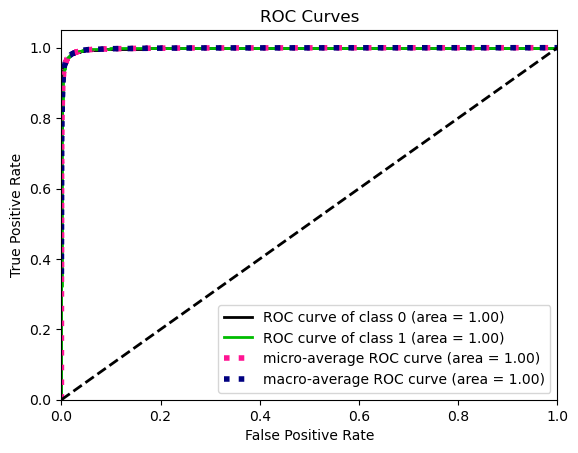

In [78]:
skplt.metrics.plot_roc(y_test,lr_tfidf.predict_proba(tf_test))

In [81]:
#training the linear svm
svm=SGDClassifier(class_weight='balanced')


#fitting the svm for bag of words
svm_bow=svm.fit(cv_train,y_train)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tf_train,y_train)
print(svm_tfidf)

SGDClassifier(class_weight='balanced')
SGDClassifier(class_weight='balanced')


In [83]:
#Predicting the model for bag of words
svm_bow_predict=svm_bow.predict(cv_test)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm_tfidf.predict(tf_test)
print(svm_tfidf_predict)

[0 1 1 ... 0 0 1]
[0 1 1 ... 0 0 1]


In [84]:
print(report(y_test,svm_bow_predict,svm_bow.classes_ ))

accuracy_score:
 0.9744025776425311

Confusion Matrix:
      0     1
0  5616   254
1    32  5271

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5870
           1       0.95      0.99      0.97      5303

    accuracy                           0.97     11173
   macro avg       0.97      0.98      0.97     11173
weighted avg       0.98      0.97      0.97     11173



In [85]:
print(report(y_test,svm_tfidf_predict, svm_tfidf.classes_ ))

accuracy_score:
 0.9873802917748142

Confusion Matrix:
      0     1
0  5780    90
1    51  5252

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5870
           1       0.98      0.99      0.99      5303

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



In [87]:

#training the model
mnb=MultinomialNB(alpha=1)
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train,y_train)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tf_train,y_train)
print(mnb_tfidf)

MultinomialNB(alpha=1)
MultinomialNB(alpha=1)


In [89]:
#Predicting the model for bag of words
mnb_bow_predict=mnb_bow.predict(cv_test)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb_tfidf.predict(tf_test)
print(mnb_tfidf_predict)

[0 1 1 ... 0 0 1]
[0 1 1 ... 0 0 1]


In [90]:
print(report(y_test,mnb_bow_predict, mnb_bow.classes_ ))

accuracy_score:
 0.9539067394612011

Confusion Matrix:
      0     1
0  5641   229
1   286  5017

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5870
           1       0.96      0.95      0.95      5303

    accuracy                           0.95     11173
   macro avg       0.95      0.95      0.95     11173
weighted avg       0.95      0.95      0.95     11173



In [91]:
print(report(y_test,mnb_tfidf_predict, mnb_tfidf.classes_ ))

accuracy_score:
 0.9564127808108834

Confusion Matrix:
      0     1
0  5661   209
1   278  5025

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5870
           1       0.96      0.95      0.95      5303

    accuracy                           0.96     11173
   macro avg       0.96      0.96      0.96     11173
weighted avg       0.96      0.96      0.96     11173



In [92]:
from xgboost import XGBClassifier
xgb=XGBClassifier()


xgb_bow=xgb.fit(cv_train,y_train)
print(xgb_bow)

xgb_tfidf=xgb.fit(tf_train,y_train)
print(xgb_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              imp

In [93]:
#Predicting the model for bag of words
xgb_bow_predict=xgb_bow.predict(cv_test)
print(xgb_bow_predict)
#Predicting the model for tfidf features
xgb_tfidf_predict=xgb_tfidf.predict(tf_test)
print(xgb_tfidf_predict)

[0 1 1 ... 0 0 1]
[0 1 1 ... 0 0 1]


In [94]:
print(report(y_test,xgb_bow_predict, xgb_bow.classes_ ))

accuracy_score:
 0.9403025149914973

Confusion Matrix:
      0     1
0  5337   533
1   134  5169

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5870
           1       0.91      0.97      0.94      5303

    accuracy                           0.94     11173
   macro avg       0.94      0.94      0.94     11173
weighted avg       0.94      0.94      0.94     11173



In [95]:
print(report(y_test,xgb_tfidf_predict, xgb_tfidf.classes_ ))

accuracy_score:
 0.9901548375548197

Confusion Matrix:
      0     1
0  5814    56
1    54  5249

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5870
           1       0.99      0.99      0.99      5303

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

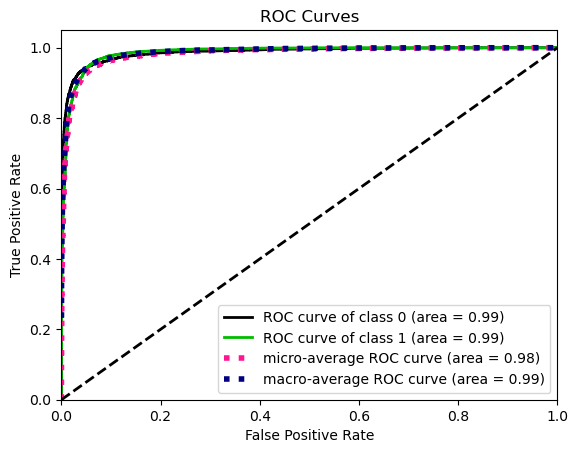

In [96]:
skplt.metrics.plot_roc(y_test,xgb_bow.predict_proba(cv_test))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

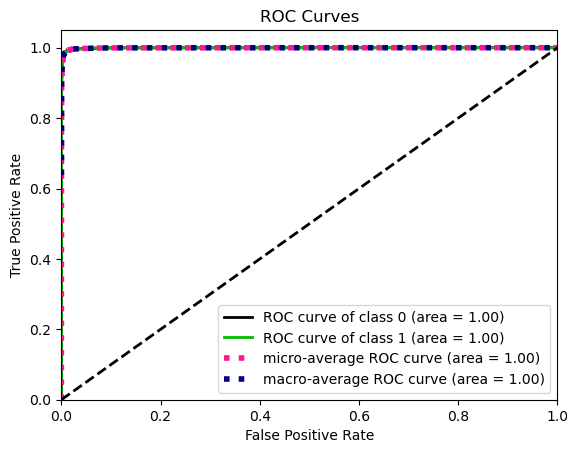

In [98]:
skplt.metrics.plot_roc(y_test,xgb_tfidf.predict_proba(tf_test))

**Tokenizing**

> Tokenizing Text -> Repsesenting each word by a number
> 
> Mapping of orginal word to number is preserved in word_index property of tokenizer
> 
> Tokenized applies basic processing like changing it to lower case, explicitely setting that as False
> 
> Lets keep all news to 256, add padding to news with less than 256 words and truncating long ones

In [41]:
max_features = 10000
maxlen = 256
batch_size = 128
epochs = 10
embed_size = 128

In [42]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=maxlen,padding='post')

In [43]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen,padding='post')

In [67]:
lr_reduce = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, factor = 0.5, min_lr = 0.00001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

**Building GRU Model**

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, output_dim=embed_size, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [73]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1,callbacks=[early_stop])

Epoch 1/10
184/184 [==============================] - 34s 144ms/step - loss: 0.5283 - accuracy: 0.6638 - val_loss: 0.6077 - val_accuracy: 0.5302
Epoch 2/10
184/184 [==============================] - 21s 114ms/step - loss: 0.2291 - accuracy: 0.9009 - val_loss: 0.8301 - val_accuracy: 0.5588
Epoch 3/10
184/184 [==============================] - 19s 106ms/step - loss: 0.1126 - accuracy: 0.9620 - val_loss: 0.2836 - val_accuracy: 0.9000
Epoch 4/10
184/184 [==============================] - 17s 91ms/step - loss: 0.0586 - accuracy: 0.9838 - val_loss: 0.1347 - val_accuracy: 0.9565
Epoch 5/10
184/184 [==============================] - 18s 97ms/step - loss: 0.0345 - accuracy: 0.9916 - val_loss: 0.0650 - val_accuracy: 0.9770
Epoch 6/10
184/184 [==============================] - 15s 83ms/step - loss: 0.0209 - accuracy: 0.9960 - val_loss: 0.0694 - val_accuracy: 0.9774
Epoch 7/10
184/184 [==============================] - 16s 87ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 0.0830 - val_accura

In [75]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")

1048/1048 [==============================] - 18s 17ms/step - loss: 0.0276 - accuracy: 0.9919
Accuracy of the model on Training Data is -  99.19143319129944 %


In [76]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

350/350 [==============================] - 6s 17ms/step - loss: 0.0623 - accuracy: 0.9772
Accuracy of the model on Testing Data is -  97.71771430969238 %


(0.0, 0.8710118190385401)

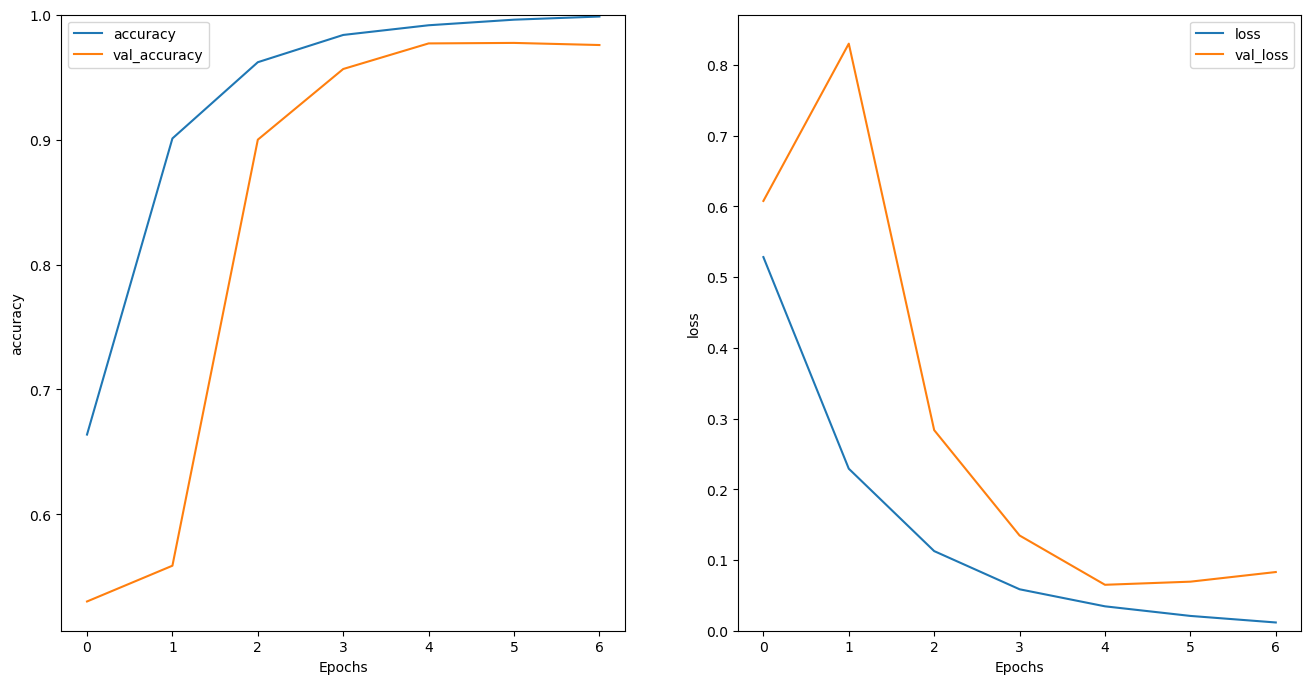

In [77]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

**Building LSTM Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, output_dim=embed_size, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [54]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1,callbacks=[early_stop])

Epoch 1/10
184/184 [==============================] - 37s 155ms/step - loss: 0.4721 - accuracy: 0.6942 - val_loss: 0.5639 - val_accuracy: 0.5297
Epoch 2/10
184/184 [==============================] - 23s 124ms/step - loss: 0.1124 - accuracy: 0.9648 - val_loss: 0.1726 - val_accuracy: 0.9385
Epoch 3/10
184/184 [==============================] - 21s 115ms/step - loss: 0.0482 - accuracy: 0.9877 - val_loss: 0.2428 - val_accuracy: 0.8825
Epoch 4/10
184/184 [==============================] - 21s 113ms/step - loss: 0.0255 - accuracy: 0.9951 - val_loss: 0.0978 - val_accuracy: 0.9583
Epoch 5/10
184/184 [==============================] - 19s 105ms/step - loss: 0.0158 - accuracy: 0.9973 - val_loss: 0.1050 - val_accuracy: 0.9712
Epoch 6/10
184/184 [==============================] - 17s 95ms/step - loss: 0.0105 - accuracy: 0.9980 - val_loss: 0.0537 - val_accuracy: 0.9854
Epoch 7/10
184/184 [==============================] - 17s 92ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0603 - val_accu

In [56]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")

1048/1048 [==============================] - 20s 19ms/step - loss: 0.0178 - accuracy: 0.9955
Accuracy of the model on Training Data is -  99.54648613929749 %


In [57]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

350/350 [==============================] - 7s 19ms/step - loss: 0.0552 - accuracy: 0.9851
Accuracy of the model on Testing Data is -  98.51427674293518 %


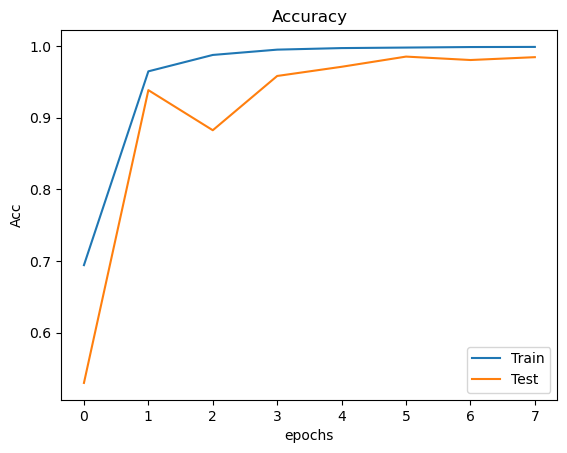

In [58]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

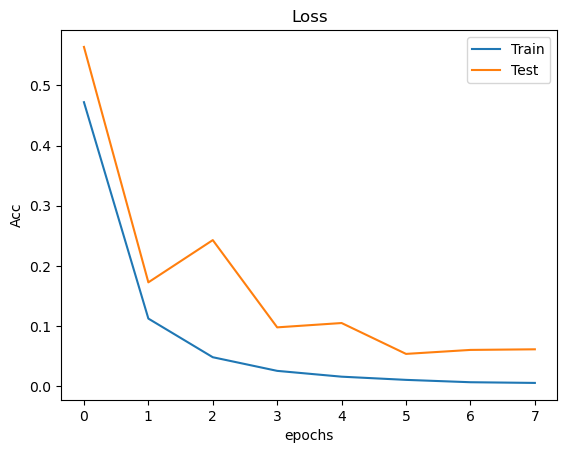

In [60]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

**Building Simple RNN Model**

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, output_dim=embed_size, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [40]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1,callbacks=[early_stop])

Epoch 1/10
184/184 [==============================] - 200s 1s/step - loss: 0.5816 - accuracy: 0.6914 - val_loss: 0.3594 - val_accuracy: 0.8500
Epoch 2/10
184/184 [==============================] - 187s 1s/step - loss: 0.2243 - accuracy: 0.8975 - val_loss: 0.1522 - val_accuracy: 0.9083
Epoch 3/10
184/184 [==============================] - 181s 983ms/step - loss: 0.0844 - accuracy: 0.9726 - val_loss: 0.0660 - val_accuracy: 0.9841
Epoch 4/10
184/184 [==============================] - 179s 970ms/step - loss: 0.0382 - accuracy: 0.9911 - val_loss: 0.0277 - val_accuracy: 0.9913
Epoch 5/10
184/184 [==============================] - 172s 934ms/step - loss: 0.0220 - accuracy: 0.9959 - val_loss: 0.0239 - val_accuracy: 0.9914
Epoch 6/10
184/184 [==============================] - 175s 949ms/step - loss: 0.0110 - accuracy: 0.9983 - val_loss: 0.0257 - val_accuracy: 0.9923
Epoch 7/10
184/184 [==============================] - 170s 926ms/step - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.0243 - val_a

In [48]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")

1048/1048 [==============================] - 73s 69ms/step - loss: 0.0106 - accuracy: 0.9969
Accuracy of the model on Training Data is -  99.68671798706055 %


In [47]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

350/350 [==============================] - 25s 70ms/step - loss: 0.0242 - accuracy: 0.9920
Accuracy of the model on Testing Data is -  99.2034375667572 %


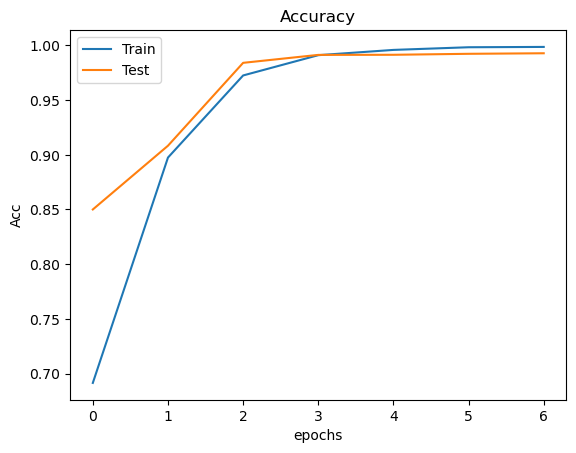

In [43]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

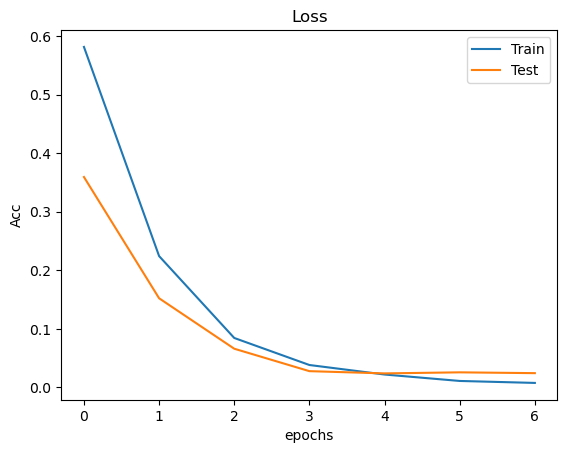

In [44]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()